# <center><B>FEATURE SCALING</center>

# Table of Contents

1. [Introduction](#Introduction)
2. [Feature Scaling Techniques](#Feature-Scaling-Techniques)


## Importing libraries

In [41]:
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette="rainbow", style="darkgrid")
import time

%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import random



## <B> 1.Introduction

Feature scaling is a crucial preprocessing step in machine learning that transforms data into a standard range or format. It's especially important when features have different units or scales, as many ML algorithms (like k-NN, SVM, Gradient Descent-based models) are sensitive to the scale of input features

### Dataset
A dataset is a collection of data points used to train and evaluate models. It typically contains features (input variables) and labels (output/target variables)

In [3]:
df = pd.read_csv("D:\\New folder\\Feature-Scaling-Techniques\\Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df=df.iloc[:,2:]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
df=df.sample(5)
df

,Age,EstimatedSalary,Purchased
106,26,35000,0
312,38,50000,0
387,39,71000,0
184,33,60000,0
354,36,99000,1


# Train test split

We split the dataset into training and test sets to evaluate the model's performance on unseen data.

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    df.drop('Purchased', axis=1),
    df['Purchased'],
    test_size=0.3,
    random_state=0
)

X_train.shape, X_test.shape

((3, 2), (2, 2))

## StandardScaler

StandardScaler from sklearn.preprocessing standardizes features by removing the mean and scaling to unit variance (Z-score normalization).

In [32]:
from sklearn.preprocessing import StandardScaler


X_train.shape, X_test.shape

scaler= StandardScaler()

scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
scaler.mean_

array([3.56666667e+01, 6.96666667e+04])

In [33]:
X_train

,Age,EstimatedSalary
312,38,50000
184,33,60000
354,36,99000


In [34]:
X_train_scaled

array([[ 1.13554995, -0.93031705],
       [-1.29777137, -0.45727448],
       [ 0.16222142,  1.38759153]])

### Scaling the Training and Test DataFrames

Apply the scaler (fitted on training data) to both training and test datasets to ensure they are on the same scale.

In [35]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled usually refers to the scaled or normalized version of your training feature set X_train in a machine learning pipeline. 
It is commonly used to improve the performance and convergence speed of machine learning models.
<br>
Why use X_train_scaled?
Some machine learning algorithms are sensitive to the scale of input features. For example:

Distance-based models: like K-Nearest Neighbors, SVM, and K-Means.

Gradient-based models: like logistic regression and neural networks.

Scaling ensures that each feature contributes equally to the model, especially when features have different units (e.g., age in years, income in thousands).

<br>


In [36]:
X_train_scaled

,Age,EstimatedSalary
0,1.135550,-0.930317
1,-1.297771,-0.457274
2,0.162221,1.387592


In [37]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,3.0,3.0
mean,35.7,69666.7
std,2.5,25890.8
min,33.0,50000.0
25%,34.5,55000.0
50%,36.0,60000.0
75%,37.0,79500.0
max,38.0,99000.0


In [38]:
import numpy as np

np.round(X_train_scaled.describe(), 1)


,Age,EstimatedSalary
count,3.0,3.0
mean,0.0,-0.0
std,1.2,1.2
min,-1.3,-0.9
25%,-0.6,-0.7
50%,0.2,-0.5
75%,0.6,0.5
max,1.1,1.4



## EFFECT OF SCALING

Scaling transforms your data so that all features contribute equally to a machine learning model.

With StandardScaler, you apply standardization, which means:

Scaled Value=𝑥−𝜇/𝜎
 
Where:
𝑥=x is the original value
𝜇=μ is the mean of the feature
𝜎=σ is the standard deviation

Before Scaling - Mean Age: 35.666666666666664 Std Dev: 2.516611478423583
After Scaling - Mean Age: 1.1564823173178713e-15 Std Dev: 1.224744871391589


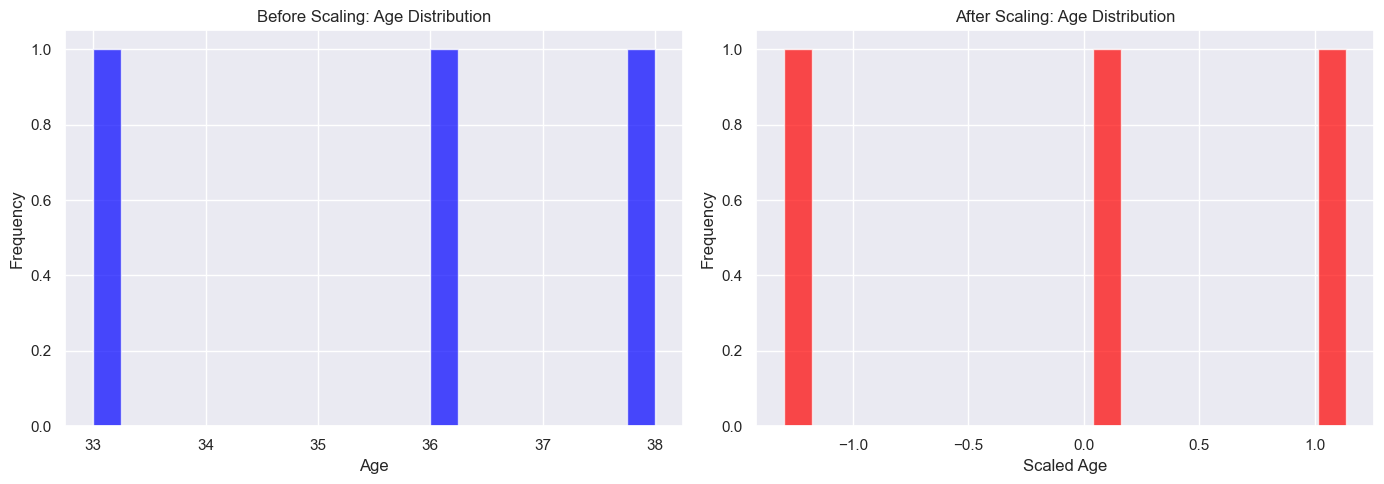

In [39]:

print("Before Scaling - Mean Age:", X_train['Age'].mean(), "Std Dev:", X_train['Age'].std())
print("After Scaling - Mean Age:", X_train_scaled['Age'].mean(), "Std Dev:", X_train_scaled['Age'].std())


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))


ax1.hist(X_train['Age'], bins=20, color='blue', alpha=0.7)
ax1.set_title('Before Scaling: Age Distribution')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.grid(True)

ax2.hist(X_train_scaled['Age'], bins=20, color='red', alpha=0.7)
ax2.set_title('After Scaling: Age Distribution')
ax2.set_xlabel('Scaled Age')
ax2.set_ylabel('Frequency')
ax2.grid(True)

plt.tight_layout()
plt.show()


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

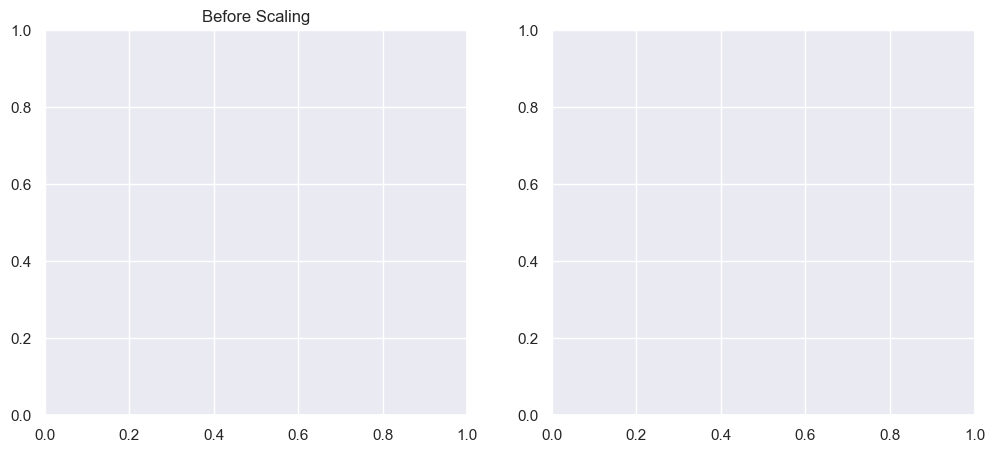

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# comparison of distributions

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

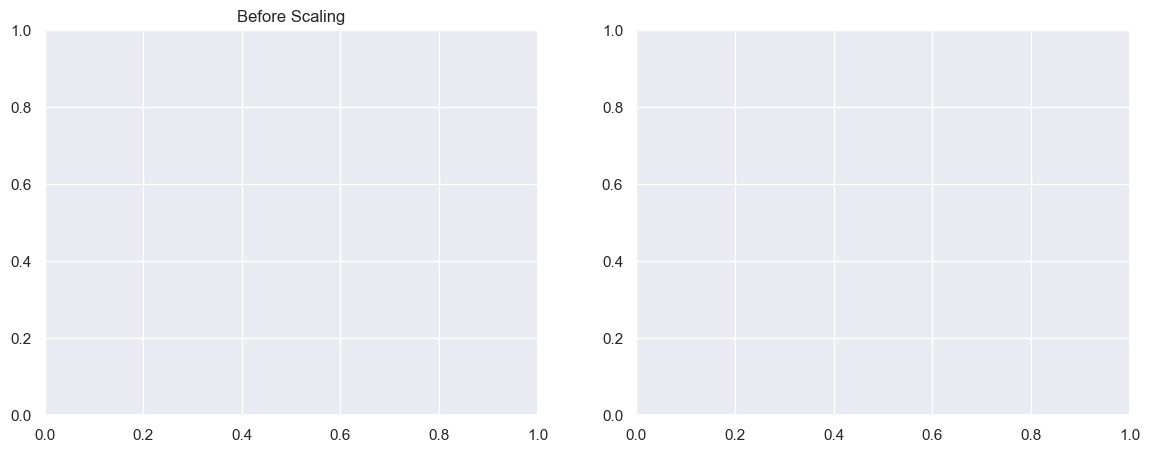

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

## importance of Scaling

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [45]:
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)

LogisticRegression()

In [46]:
Y_pred = lr.predict(X_test)
Y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
print("Actual",accuracy_score(Y_test,Y_pred))
print("Scaled",accuracy_score(Y_test,Y_pred_scaled))

Actual 1.0
Scaled 1.0


In [49]:
df.describe()

,Age,EstimatedSalary,Purchased
count,5.00000,5.000000,5.000000
mean,34.40000,63000.000000,0.200000
std,5.22494,24093.567606,0.447214
min,26.00000,35000.000000,0.000000
25%,33.00000,50000.000000,0.000000
50%,36.00000,60000.000000,0.000000
75%,38.00000,71000.000000,0.000000
max,39.00000,99000.000000,1.000000


## Outilier Effect

In [52]:
df = pd.concat(
    [
        df,
        pd.DataFrame({'Age': [5, 90, 95], 'EstimatedSalary': [1000, 250000, 350000], 'Purchased': [0, 1, 1]})
    ],
    ignore_index=True
)
df

,Age,EstimatedSalary,Purchased
0,26,35000,0
1,38,50000,0
2,39,71000,0
3,33,60000,0
4,36,99000,1
5,5,1000,0
6,90,250000,1
7,95,350000,1
8,5,1000,0
9,90,250000,1


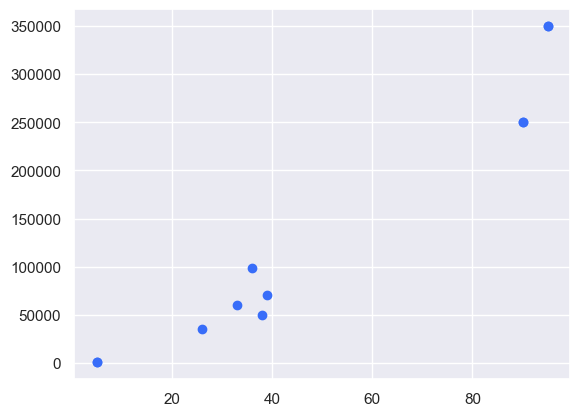

In [54]:
plt.scatter(df['Age'], df['EstimatedSalary'])

### Splitting Data into Training and Test Sets

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((7, 2), (4, 2))

##### Standardization of Training and Test Data

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

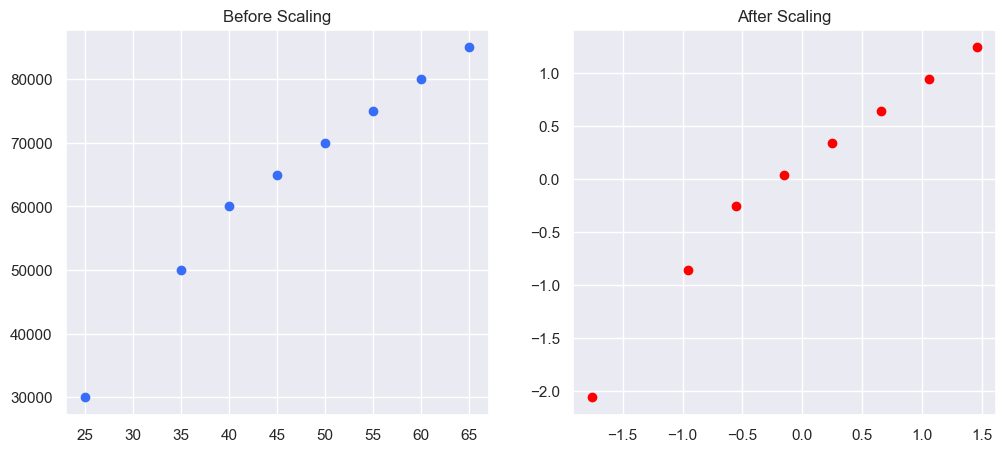

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

## <B>2.Feature Scaling Techniques





1. [Standardization](#Standardization)
2. [Normalization](#Normalization)
   - [MinMax Scaling](#MinMax-Scaling)
   - [Max Absolute Scaling](#Max-Absolute-Scaling)
   - [Robust Scaling](#Robust-Scaling)
3. [Quantile Transformation](#Quantile-Transformation)
4. [Binarization](#Binarization)
5. [Feature Scaling Techniques Applied to Age and Fare](#Feature-Scaling-Techniques-Applied-to-Age-and-Fare)



Feature scaling is an essential step in preprocessing data for many machine learning algorithms, especially those based on distance metrics or gradient descent (e.g., KNN, SVM, Logistic Regression). Below are commonly used techniques:

### Dataset

In [63]:
df = pd.read_csv("D:\\New folder\\Feature-Scaling-Techniques\\train.csv", usecols=["Age", "Fare"])
df["Fare"].fillna(value=df["Fare"].mean(), inplace=True)
df

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


## Standardization

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Instantiate
start_time = time.time()
scaled_data = scaler.fit_transform(df[['Age', 'Fare']].fillna(0))  # Handle NaN with fillna
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for Standardization scaling: {elapsed_time:.6f} seconds")
scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Fare'])


Time taken for Standardization scaling: 0.004998 seconds


Time taken for Standardization scaling: 0.003000 seconds


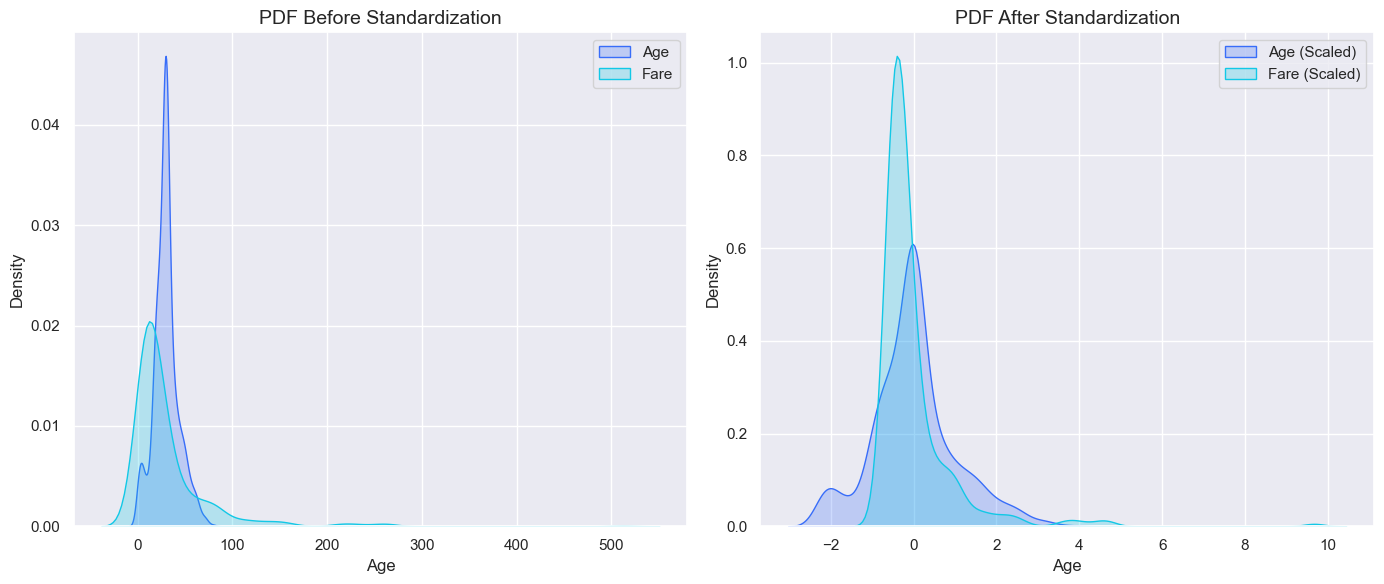

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time

# Load the dataset
df = pd.read_csv("D:\\New folder\\Feature-Scaling-Techniques\\train.csv", usecols=["Age", "Fare"])

# Fill missing values
df["Age"].fillna(value=df["Age"].mean(), inplace=True)
df["Fare"].fillna(value=df["Fare"].mean(), inplace=True)

# Standard Scaling
scaler = StandardScaler()
start_time = time.time()
scaled_data = scaler.fit_transform(df[["Age", "Fare"]])
end_time = time.time()

# Print elapsed time
elapsed_time = end_time - start_time
print(f"Time taken for Standardization scaling: {elapsed_time:.6f} seconds")

# Create DataFrame of scaled data
scaled_df = pd.DataFrame(scaled_data, columns=["Age", "Fare"])

# Plotting KDE before and after scaling
plt.figure(figsize=(14, 6))

# Before scaling
plt.subplot(1, 2, 1)
plt.title("PDF Before Standardization", fontsize=14)
sns.kdeplot(df["Age"], label="Age", fill=True)
sns.kdeplot(df["Fare"], label="Fare", fill=True)
plt.legend()

# After scaling
plt.subplot(1, 2, 2)
plt.title("PDF After Standardization", fontsize=14)
sns.kdeplot(scaled_df["Age"], label="Age (Scaled)", fill=True)
sns.kdeplot(scaled_df["Fare"], label="Fare (Scaled)", fill=True)
plt.legend()

plt.tight_layout()
plt.show()


<b>Explanation:<br>

We use StandardScaler to standardize numerical data by centering it around a mean of 0 and scaling it to have a unit variance, which is especially useful for features with different scales, such as Age and Fare. This technique ensures that no single feature disproportionately influences machine learning models, particularly those sensitive to scale like SVMs, k-NN, or logistic regression. Standardization also improves the performance of gradient-based models and algorithms relying on distance metrics by ensuring all features contribute equally. It is most effective for normally distributed data, making it ideal for preparing features like Age and Fare for modeling.

## Normalization

 ####  1 . Min Max Scaling

Min-Max Scaling rescales features to a specific range — usually [0, 1].

The formula is:𝑋scaled=𝑋−𝑋min/𝑋max−𝑋min
<br>

 Why Use It?<br>
Useful for algorithms that use distance metrics, like KNN, K-Means, SVM, or Neural Networks.

Ensures that all features contribute equally to model training.


In [81]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time

# Load the dataset
df = pd.read_csv("D:\\New folder\\Feature-Scaling-Techniques\\train.csv", usecols=["Age", "Fare"])

# Fill missing values
df["Age"].fillna(value=df["Age"].mean(), inplace=True)
df["Fare"].fillna(value=df["Fare"].mean(), inplace=True)
scaler = MinMaxScaler()
start_time = time.time()
scaled_data = scaler.fit_transform(df[['Age', 'Fare']].fillna(0))
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for MinMax scaling: {elapsed_time:.6f} seconds")

scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Fare'])


Time taken for MinMax scaling: 0.003020 seconds


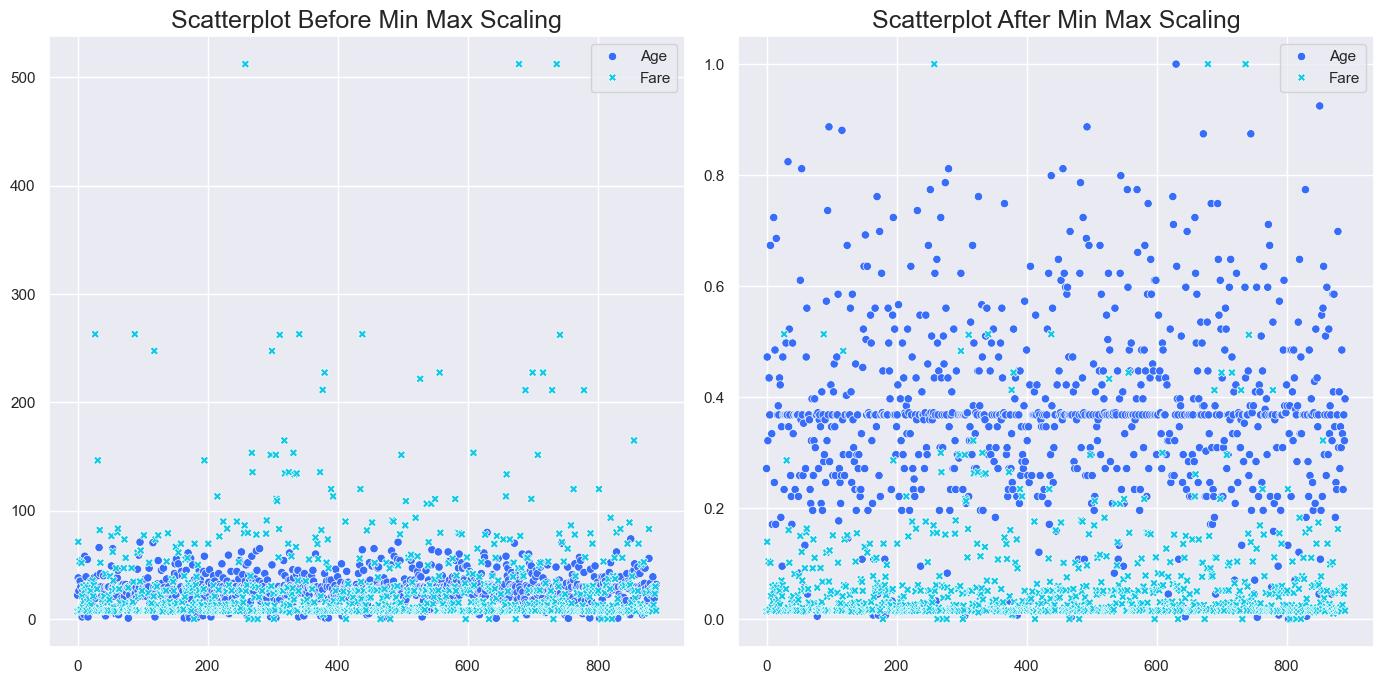

In [95]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Min Max Scaling", fontsize=18)
sns.scatterplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Min Max Scaling", fontsize=18)
sns.scatterplot(data = scaled_df, color="red")
plt.tight_layout()
plt.show()

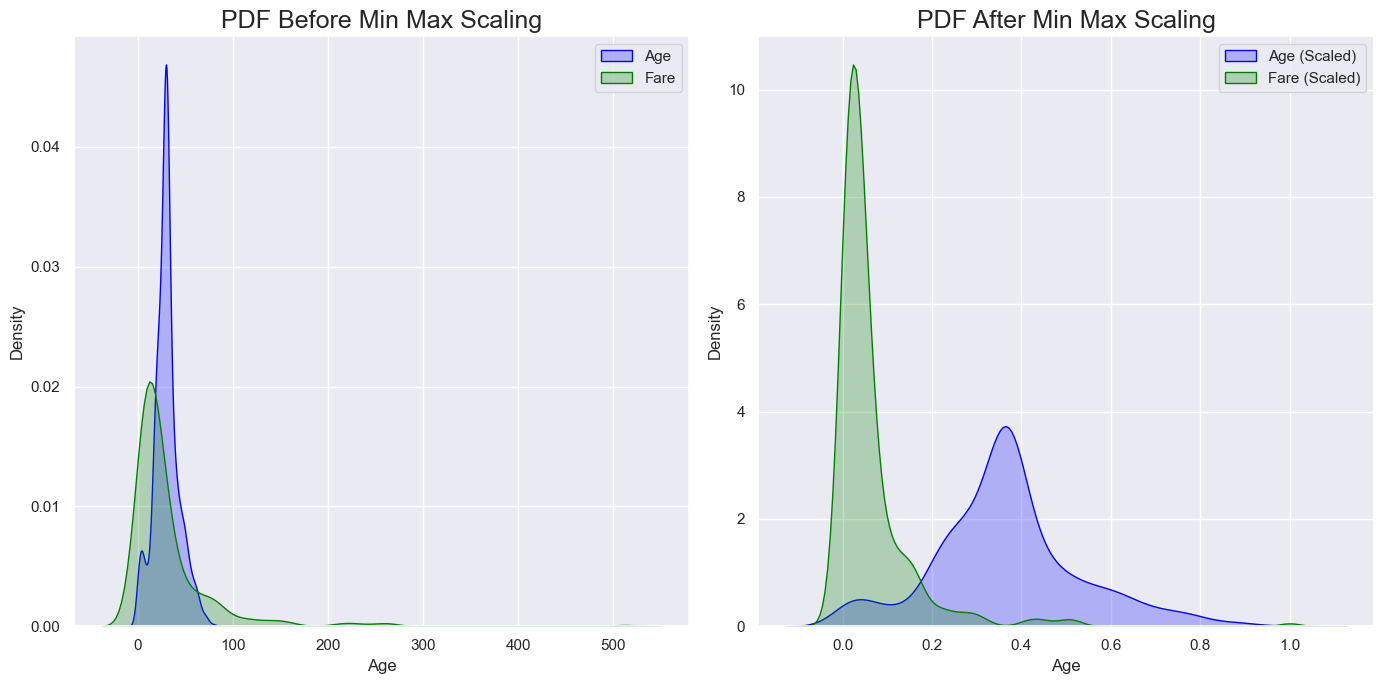

In [102]:


# Plotting
plt.figure(figsize=(14,7))

# Plot the KDE before scaling for Age and Fare separately
plt.subplot(1, 2, 1)
plt.title("PDF Before Min Max Scaling", fontsize=18)
sns.kdeplot(df['Age'], color="blue", label="Age", fill=True)
sns.kdeplot(df['Fare'], color="green", label="Fare", fill=True)
plt.legend()

# Plot the KDE after scaling for Age and Fare separately
plt.subplot(1, 2, 2)
plt.title("PDF After Min Max Scaling", fontsize=18)
sns.kdeplot(scaled_df['Age'], color="blue", label="Age (Scaled)", fill=True)
sns.kdeplot(scaled_df['Fare'], color="green", label="Fare (Scaled)", fill=True)
plt.legend()

plt.tight_layout()
plt.show()


<b>Explanation:<br>

We use MinMaxScaler to normalize numerical data by scaling features to a specified range, typically between 0 and 1. This technique is particularly useful when the data has varying scales, like Age and Fare, and when the machine learning model benefits from normalized inputs, such as neural networks or gradient-based algorithms. MinMaxScaler preserves the relationships between data points and does not distort the distribution, making it ideal for algorithms that do not assume any specific distribution of data. It ensures all features contribute equally, avoids domination by larger-scale features, and improves model performance and convergence.

###   2 . Max Absolute Scaling

Max Absolute Scaling is a normalization technique used to scale each feature by its maximum absolute value, so that the values fall within the range [-1, 1].

In [103]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
start_time = time.time()
scaled_data = scaler.fit_transform(df[['Age', 'Fare']].fillna(0))
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for Max Absolute Scaling scaling: {elapsed_time:.6f} seconds")
scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Fare'])


Time taken for Max Absolute Scaling scaling: 0.004008 seconds


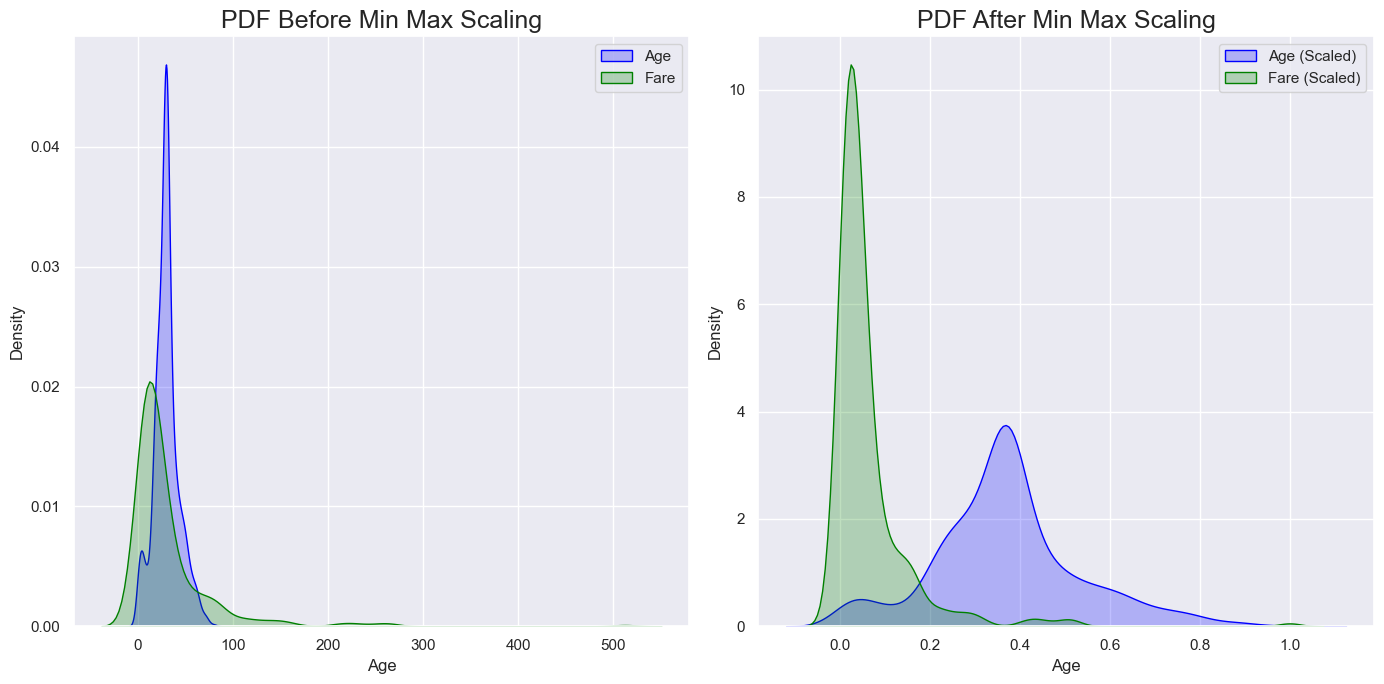

In [105]:
# Plotting
plt.figure(figsize=(14,7))

# Plot the KDE before scaling for Age and Fare separately
plt.subplot(1, 2, 1)
plt.title("PDF Before Min Max Scaling", fontsize=18)
sns.kdeplot(df['Age'], color="blue", label="Age", fill=True)
sns.kdeplot(df['Fare'], color="green", label="Fare", fill=True)
plt.legend()

# Plot the KDE after scaling for Age and Fare separately
plt.subplot(1, 2, 2)
plt.title("PDF After Min Max Scaling", fontsize=18)
sns.kdeplot(scaled_df['Age'], color="blue", label="Age (Scaled)", fill=True)
sns.kdeplot(scaled_df['Fare'], color="green", label="Fare (Scaled)", fill=True)
plt.legend()

plt.tight_layout()
plt.show()

<b>Explanation:<br>

We use MaxAbsScaler to scale numerical data by dividing each feature by its maximum absolute value, transforming the data into the range [-1, 1] while preserving the sign of the values. This technique is particularly useful for data with both positive and negative values, ensuring that the scale of the features does not distort the model. Unlike other scalers, MaxAbsScaler does not shift the data (e.g., does not center around zero), making it ideal for sparse datasets where maintaining sparsity is important. It is effective for algorithms sensitive to feature scales, ensuring all features contribute equally to the model.

###   3.Robust Scaling

In [106]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
start_time = time.time()

scaled_data = scaler.fit_transform(df[['Age', 'Fare']].fillna(0))
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for Robust Scaling scaling: {elapsed_time:.6f} seconds")

scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Fare'])


Time taken for Robust Scaling scaling: 0.005002 seconds


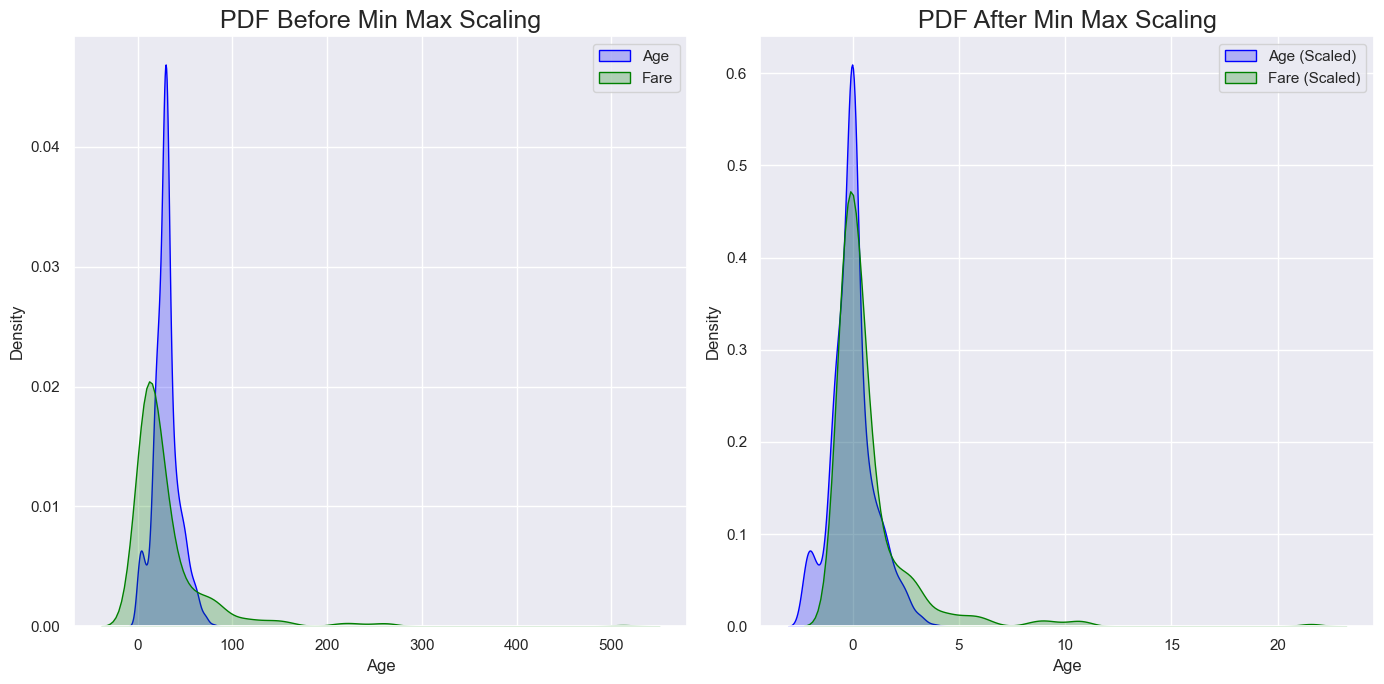

In [107]:
# Plotting
plt.figure(figsize=(14,7))

# Plot the KDE before scaling for Age and Fare separately
plt.subplot(1, 2, 1)
plt.title("PDF Before Min Max Scaling", fontsize=18)
sns.kdeplot(df['Age'], color="blue", label="Age", fill=True)
sns.kdeplot(df['Fare'], color="green", label="Fare", fill=True)
plt.legend()

# Plot the KDE after scaling for Age and Fare separately
plt.subplot(1, 2, 2)
plt.title("PDF After Min Max Scaling", fontsize=18)
sns.kdeplot(scaled_df['Age'], color="blue", label="Age (Scaled)", fill=True)
sns.kdeplot(scaled_df['Fare'], color="green", label="Fare (Scaled)", fill=True)
plt.legend()

plt.tight_layout()
plt.show()

<b>Explanation:<br>

RobustScaler is used to scale numerical data by removing the median and scaling according to the interquartile range (IQR), which makes it robust to outliers. It is particularly useful when the dataset contains outliers, as it minimizes their influence by using the median and IQR rather than the mean and standard deviation. This technique helps in stabilizing feature scales without distorting the central distribution of the data, making it ideal for models sensitive to outliers but requiring normalized input.

### QuantileTransformer

In [108]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(output_distribution='uniform', random_state=42)
start_time = time.time()
scaled_data = scaler.fit_transform(df[['Age', 'Fare']].fillna(0))
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for QuantileTransformer scaling: {elapsed_time:.6f} seconds")
scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Fare'])


Time taken for QuantileTransformer scaling: 0.181079 seconds


C:\Users\admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn(


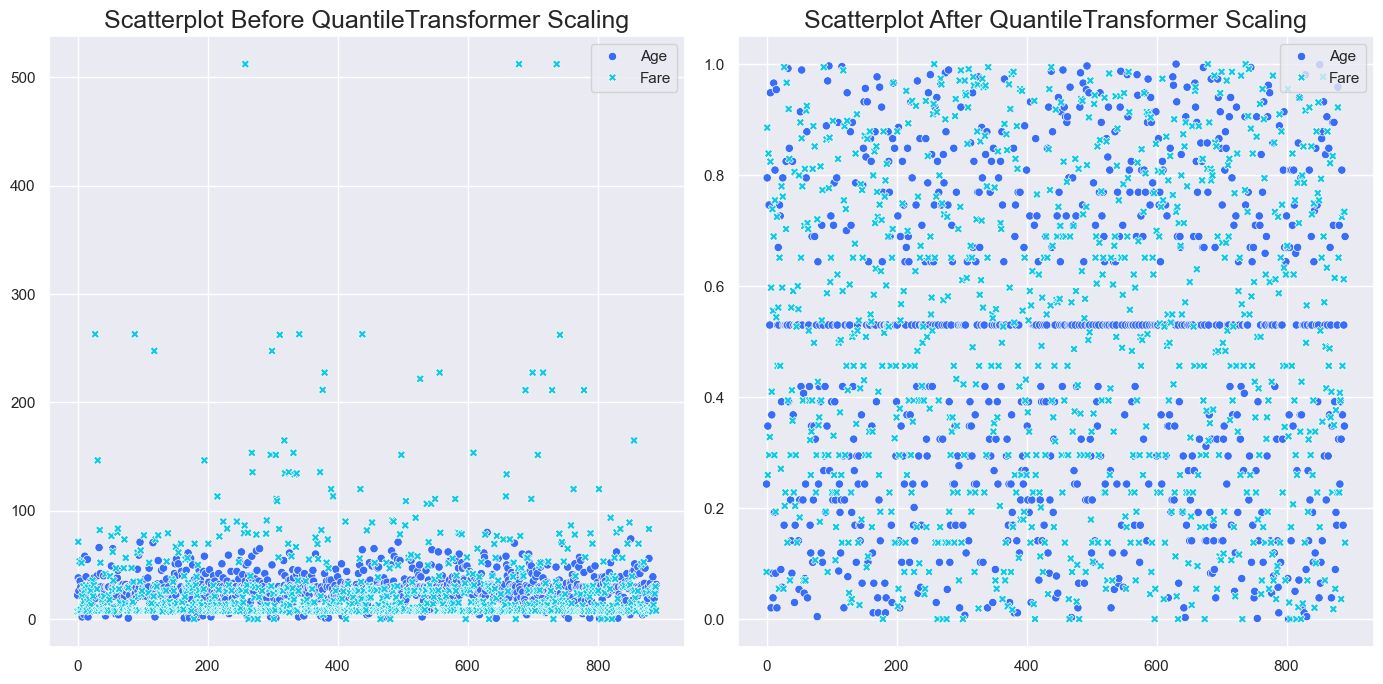

In [109]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before QuantileTransformer Scaling", fontsize=18)
sns.scatterplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After QuantileTransformer Scaling", fontsize=18)
sns.scatterplot(data = scaled_df, color="red")
plt.tight_layout()
plt.show()

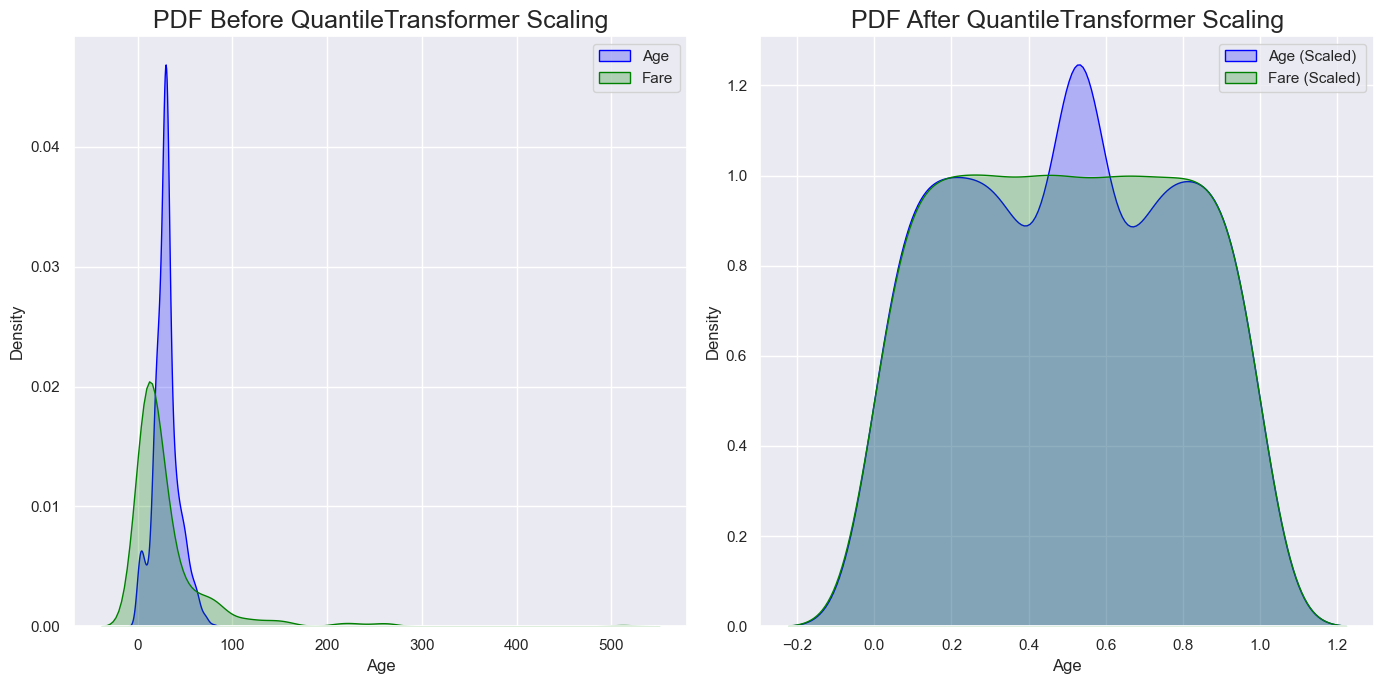

In [111]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before QuantileTransformer Scaling", fontsize=18)
sns.kdeplot(df['Age'], color="blue", label="Age", fill=True)
sns.kdeplot(df['Fare'], color="green", label="Fare", fill=True)
plt.legend()
plt.subplot(1,2,2)
plt.title("PDF After QuantileTransformer Scaling", fontsize=18)
sns.kdeplot(scaled_df['Age'], color="blue", label="Age (Scaled)", fill=True)
sns.kdeplot(scaled_df['Fare'], color="green", label="Fare (Scaled)", fill=True)
plt.legend()
plt.tight_layout()
plt.show()

<b>Explanation:<br>

The QuantileTransformer with output_distribution='uniform' transforms the data to follow a uniform distribution by mapping feature values to ranks between 0 and 1. This is especially useful for handling skewed or non-normal data, as it normalizes the distribution and makes it more comparable across features. By replacing missing values with 0 and applying the transformation to the Age and Fare columns, the data is rescaled in a way that can improve model performance, particularly for algorithms sensitive to the shape of the data distribution, such as tree-based models or linear models.

### Binarizer

In [112]:
from sklearn.preprocessing import Binarizer

scaler = Binarizer(threshold=10)  # Example threshold
start_time = time.time()
scaled_data = scaler.fit_transform(df[['Age', 'Fare']].fillna(0))
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for Binarizer scaling: {elapsed_time:.6f} seconds")

scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Fare'])


Time taken for Binarizer scaling: 0.003974 seconds


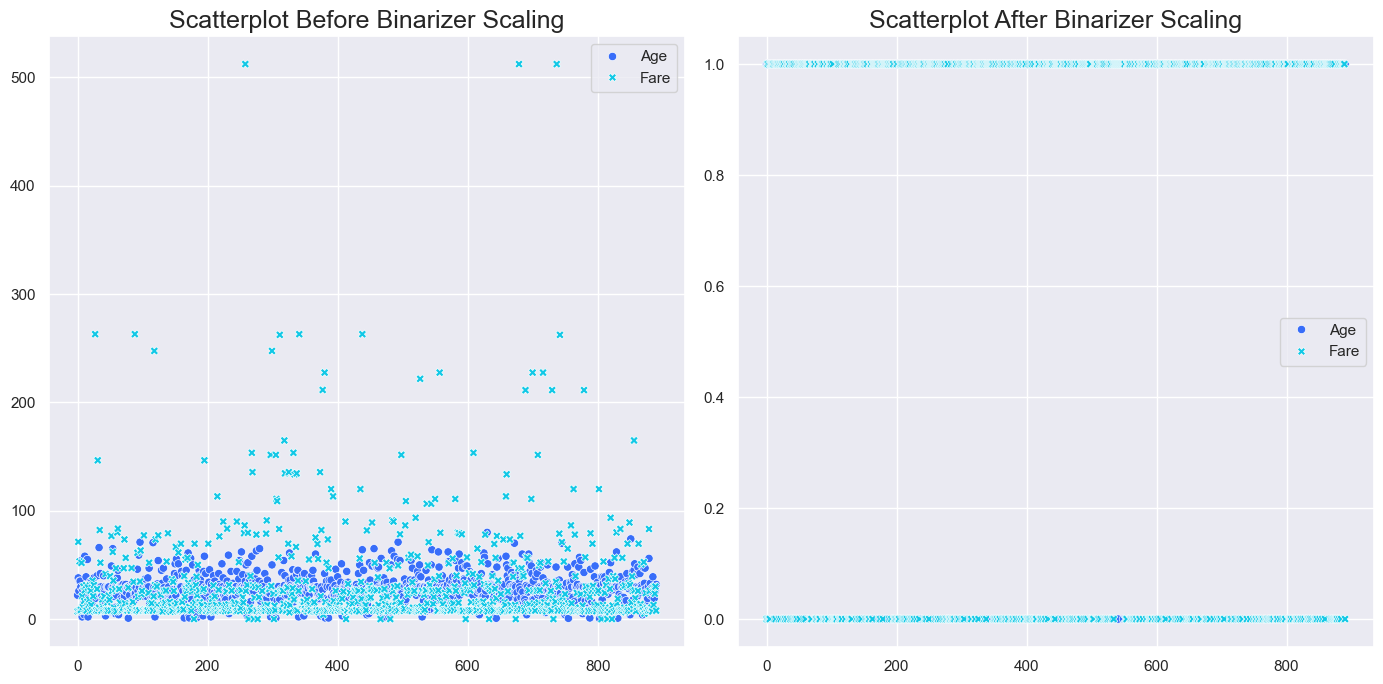

In [113]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Binarizer Scaling", fontsize=18)
sns.scatterplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Binarizer Scaling", fontsize=18)
sns.scatterplot(data = scaled_df, color="red")
plt.tight_layout()
plt.show()

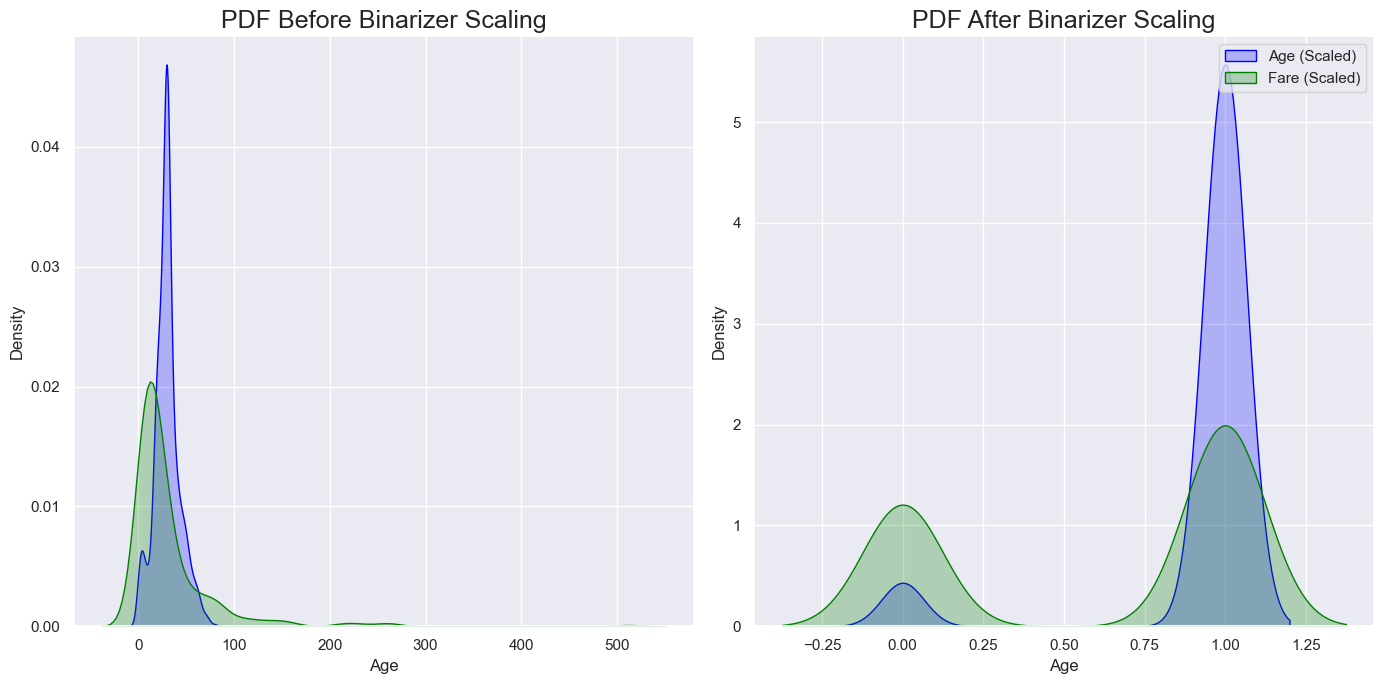

In [115]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Binarizer Scaling", fontsize=18)
sns.kdeplot(df['Age'], color="blue", label="Age", fill=True)
sns.kdeplot(df['Fare'], color="green", label="Fare", fill=True)
plt.subplot(1,2,2)
plt.title("PDF After Binarizer Scaling", fontsize=18)
sns.kdeplot(scaled_df['Age'], color="blue", label="Age (Scaled)", fill=True)
sns.kdeplot(scaled_df['Fare'], color="green", label="Fare (Scaled)", fill=True)
plt.legend()
plt.tight_layout()
plt.show()

<b>Explanation:<br>

The Binarizer with a threshold of 10 transforms the Age and Fare values in the dataset into binary values based on whether they are above or below the threshold. Any value greater than 10 becomes 1, while any value less than or equal to 10 is transformed into 0. This transformation is applied after filling missing values with 0. Binarization is useful when you want to convert continuous features into binary features, making it easier to apply models that require binary inputs or when trying to simplify the data for certain types of analyses or classification tasks.

##  Feature Scaling Techniques Applied to Age and Fare

In [116]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, QuantileTransformer, PowerTransformer
import pandas as pd

start_time = time.time()
# Handle missing values
numeric_data = df[['Age', 'Fare']].fillna(0)

# 1. StandardScaler
scaler = StandardScaler()
standard_scaled = scaler.fit_transform(numeric_data)

# 2. RobustScaler
scaler = RobustScaler()
robust_scaled = scaler.fit_transform(numeric_data)

# 3. MinMaxScaler
scaler = MinMaxScaler()
minmax_scaled = scaler.fit_transform(numeric_data)

# 4. QuantileTransformer (Gaussian)
scaler = QuantileTransformer(output_distribution='normal', random_state=42)
quantile_gaussian_scaled = scaler.fit_transform(numeric_data)

# 5. PowerTransformer (Yeo-Johnson)
scaler = PowerTransformer(method='yeo-johnson')
power_scaled = scaler.fit_transform(numeric_data)

# Combine results into a DataFrame for comparison
scaled_df = pd.DataFrame({
    'Age_Standard': standard_scaled[:, 0],
    'Fare_Standard': standard_scaled[:, 1],
    'Age_Robust': robust_scaled[:, 0],
    'Fare_Robust': robust_scaled[:, 1],
    'Age_MinMax': minmax_scaled[:, 0],
    'Fare_MinMax': minmax_scaled[:, 1],
    'Age_QuantileGaussian': quantile_gaussian_scaled[:, 0],
    'Fare_QuantileGaussian': quantile_gaussian_scaled[:, 1],
    'Age_Power': power_scaled[:, 0],
    'Fare_Power': power_scaled[:, 1]
})
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for Feature Scaling Techniques Applied to Age and Fare: {elapsed_time:.6f} seconds")
scaled_df.head()


Time taken for Feature Scaling Techniques Applied to Age and Fare: 0.062016 seconds


C:\Users\admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn(


,Age_Standard,Fare_Standard,Age_Robust,Fare_Robust,Age_MinMax,Fare_MinMax,Age_QuantileGaussian,Fare_QuantileGaussian,Age_Power,Fare_Power
0,-0.592481,-0.502445,-0.592240,-0.312011,0.271174,0.014151,-0.695859,-1.373288,-0.556267,-0.878820
1,0.638789,0.786845,0.638529,2.461242,0.472229,0.139136,0.823696,1.202387,0.657269,1.336651
2,-0.284663,-0.488854,-0.284548,-0.282777,0.321438,0.015469,-0.391395,-0.644732,-0.241577,-0.790065
3,0.407926,0.420730,0.407760,1.673732,0.434531,0.103644,0.662165,0.989391,0.437923,1.067352
4,0.407926,-0.486337,0.407760,-0.277363,0.434531,0.015713,0.662165,-0.537371,0.437923,-0.774439


#### Use Cases for Different Feature Scaling Techniques

1. StandardScaler: Used when data is normally distributed, standardizing to zero mean and unit variance.

2. RobustScaler: Ideal for data with outliers, scaling using median and interquartile range.

3. MinMaxScaler: Scales data to a specific range (e.g., [0, 1]).

4. QuantileTransformer: Transforms data to a Gaussian distribution, useful for non-normal data.

5. PowerTransformer: Transforms skewed data to a more Gaussian-like distribution.

#### Reason for Selecting Age and Fare for Scaling

Age and Fare are chosen for scaling because they are continuous numeric features with varying ranges and potential outliers. Scaling ensures these features contribute equally to machine learning models, preventing dominance from larger ranges. Categorical features like Embarked, Sex, and Pclass are excluded since they require encoding, not scaling.

#### Best Scaling Method for the Dataset: RobustScaler

For this dataset, RobustScaler is likely the best scaling method. This is because both Age and Fare are numeric features that may have outliers or non-Gaussian distributions. The RobustScaler is less sensitive to outliers compared to other scaling methods like StandardScaler, as it uses the median and interquartile range for scaling, making it more robust in the presence of outliers. Additionally, it ensures that the scaling is not distorted by extreme values, which is common in datasets like Age and Fare. Therefore, RobustScaler would be the most suitable method to ensure stable and effective scaling in this case.

<b>Explanation:<br>

The provided code applies five feature scaling techniques (StandardScaler, RobustScaler, MinMaxScaler, QuantileTransformer with Gaussian distribution, and PowerTransformer with Yeo-Johnson method) to the numeric columns Age and Fare in a DataFrame after handling missing values by filling them with 0. Each scaler transforms the data based on its specific method: StandardScaler standardizes features to have zero mean and unit variance, RobustScaler scales features using their median and IQR to reduce the influence of outliers, MinMaxScaler normalizes features to a 0-1 range, QuantileTransformer converts data into a Gaussian distribution, and PowerTransformer stabilizes variance and normalizes skewness. Finally, the scaled results for each technique are combined into a new DataFrame for comparison.

#### Time complexity Graph

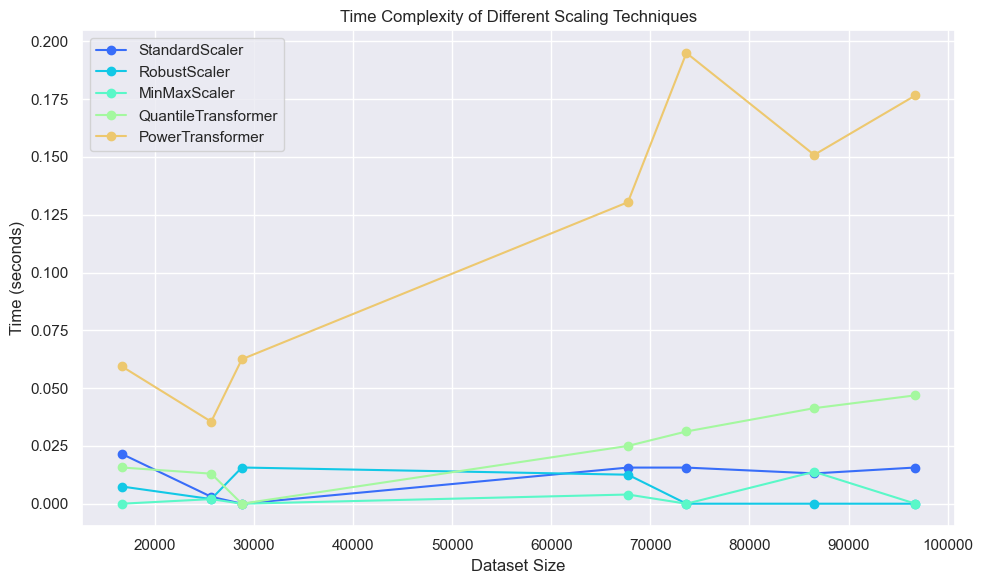

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, QuantileTransformer, PowerTransformer

sizes = sorted([random.randint(10, 100000) for _ in range(7)])
times = {
    'StandardScaler': [],
    'RobustScaler': [],
    'MinMaxScaler': [],
    'QuantileTransformer': [],
    'PowerTransformer': []
}

for size in sizes:
    data = np.random.rand(size, 2)

    start_time = time.time()
    StandardScaler().fit_transform(data)
    times['StandardScaler'].append(time.time() - start_time)

    start_time = time.time()
    RobustScaler().fit_transform(data)
    times['RobustScaler'].append(time.time() - start_time)

    start_time = time.time()
    MinMaxScaler().fit_transform(data)
    times['MinMaxScaler'].append(time.time() - start_time)

    start_time = time.time()
    QuantileTransformer(output_distribution='normal', random_state=0).fit_transform(data)
    times['QuantileTransformer'].append(time.time() - start_time)

    start_time = time.time()
    PowerTransformer().fit_transform(data)
    times['PowerTransformer'].append(time.time() - start_time)

# Plotting the results
plt.figure(figsize=(10, 6))
for technique, time_data in times.items():
    plt.plot(sizes, time_data, label=technique, marker='o')

plt.title('Time Complexity of Different Scaling Techniques')
plt.xlabel('Dataset Size')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
